In [7]:
# Import required libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import sklearn


# Import necessary modules

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt


# Keras specific

import keras

from keras.models import Sequential

from keras.layers import Dense

#from keras.utils import to_categorical
import math

In [180]:
import math
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

path="unionMatrix_Class.csv"
df = pd.read_csv(path)
labels_tmp = df["label"].values
df = df.drop(["sample_ID","label"],axis=1).values

df = (df-df.mean())/df.std()

for i in range(len(df[0])):
    df[i] = (df[i] - df[i].mean())/df[i].std()
    if math.isnan(df[i][0]):
        df[i] = np.zeros(len(df[i]))
labels = []
pca.fit(df)
df = pca.transform(df)
for i in range(len(labels_tmp)):
    tmp = np.zeros(5)
    tmp[labels_tmp[i]] = 1
    labels.append(tmp)
labels = np.array(labels)

In [181]:

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.30, random_state=40)


In [182]:
from keras.layers import Embedding
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=5))




model.add(Dense(75, activation='relu'))
model.add(Dense(50, activation='relu'))


model.add(Dense(10, activation='relu'))

model.add(Dense(5, activation='softmax'))


# Compile the model

model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])

In [183]:
history = model.fit(X_train, y_train, epochs=70)

Epoch 1/70
29/29 [==============================] - 1s 3ms/step - loss: 1.5850 - accuracy: 0.3592
Epoch 2/70
29/29 [==============================] - 0s 2ms/step - loss: 1.4218 - accuracy: 0.4146
Epoch 3/70
29/29 [==============================] - 0s 2ms/step - loss: 1.1843 - accuracy: 0.4302
Epoch 4/70
29/29 [==============================] - 0s 3ms/step - loss: 1.1048 - accuracy: 0.4911
Epoch 5/70
29/29 [==============================] - 0s 2ms/step - loss: 1.0862 - accuracy: 0.5144
Epoch 6/70
29/29 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.4945
Epoch 7/70
29/29 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.5155
Epoch 8/70
29/29 [==============================] - 0s 5ms/step - loss: 1.0717 - accuracy: 0.4878
Epoch 9/70
29/29 [==============================] - 0s 4ms/step - loss: 1.0581 - accuracy: 0.5222
Epoch 10/70
29/29 [==============================] - 0s 4ms/step - loss: 1.0531 - accuracy: 0.5200
Epoch 11/70
29/29 [

In [184]:
import sklearn.metrics
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))



pred_test= model.predict(X_test)

scores2 = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

pred_labeld = [np.argmax(x) for x in pred_test]
y_labeld = [np.argmax(x) for x in y_test]
pre_labeled = [np.argmax(x) for x in pred_train]
yTest_labeled = [np.argmax(x) for x in y_train]
print("mathew_coef: ", sklearn.metrics.matthews_corrcoef(y_labeld,pred_labeld))
print("mathew_coef: ", sklearn.metrics.matthews_corrcoef(yTest_labeled,pre_labeled))


29/29 [==============================] - 0s 2ms/step
Accuracy on training data: 0.7039911150932312% 
 Error on training data: 0.2960088849067688
13/13 [==============================] - 0s 3ms/step
Accuracy on test data: 0.45478036999702454% 
 Error on test data: 0.5452196300029755
mathew_coef:  0.044920783137925205
mathew_coef:  0.47943886701741134


In [171]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_labeld,pred_labeld)

array([[108,  70,   6,   6,   0],
       [ 71,  63,   4,   3,   3],
       [ 18,  12,   0,   0,   0],
       [  9,   4,   2,   0,   0],
       [  3,   2,   1,   2,   0]], dtype=int64)

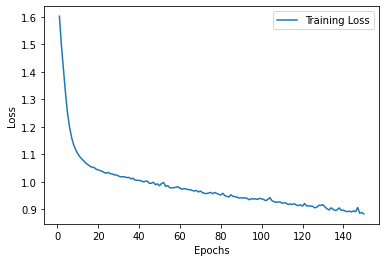

In [172]:
wloss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

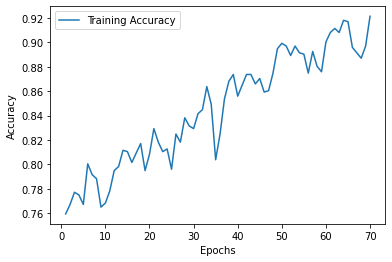

In [173]:
acc_values = history.history['accuracy']
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()